Запускался SVM с полиномиальным ядром степени 2 и $C=1$ с применением метода главных компонент для входных данных. Получил точность 98.01%.

In [1]:
from __future__ import print_function

import sys

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import sklearn


import random

In [2]:
import sklearn.datasets

In [3]:
from sklearn.datasets.mldata import fetch_mldata
mnist = fetch_mldata('mnist-original', data_home='./mnist-original')

In [4]:
X, Y = mnist['data'], np.array(mnist['target'], dtype='int')


In [5]:
import sklearn.decomposition

pca = sklearn.decomposition.PCA(n_components=45, whiten=True)
pca.fit(X)
X = pca.transform(X)


In [6]:
ntrain_dev = 60000
X_train_dev, Y_train_dev = X[:ntrain_dev], Y[:ntrain_dev]
X_test, Y_test = X[ntrain_dev:], Y[ntrain_dev:]

In [7]:
permutation = np.random.permutation(ntrain_dev)
ntrain = ntrain_dev * 90 / 100
X_train, Y_train = X_train_dev[permutation][:ntrain], Y_train_dev[permutation][:ntrain]
X_dev, Y_dev = X_train_dev[permutation][ntrain:], Y_train_dev[permutation][ntrain:]

In [8]:
def filter_by_digits(x, y, digits, limit=None):
    indices = [i for i in xrange(len(x)) if y[i] in digits]
    limit = limit or len(indices)
    return x[indices][:limit], y[indices][:limit]

cool_digits = [0, 1, 2, 3, 4, 5]
x_train, y_train = filter_by_digits(X_train, Y_train, cool_digits, 3000)
x_dev, y_dev = filter_by_digits(X_dev, Y_dev, cool_digits, 100)
x_test, y_test = filter_by_digits(X_test, Y_test, cool_digits, 100)

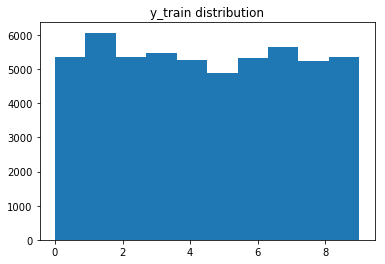

In [9]:
plt.hist(Y_train)
plt.title('y_train distribution')
plt.show()

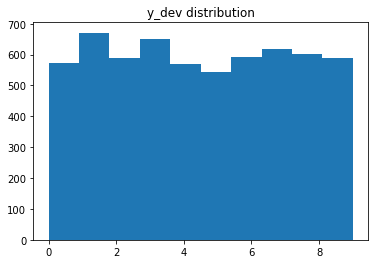

In [10]:
plt.hist(Y_dev)
plt.title('y_dev distribution')
plt.show()

In [11]:
import sklearn.svm

In [12]:
estimator = sklearn.svm.SVC(kernel='poly', C=1, degree=2)
estimator.fit(X_train, Y_train)
print('SVC score on subtrain:', estimator.score(X_train, Y_train))
print('SVC score on validation:', estimator.score(X_dev, Y_dev))
print('SVC score on test:', estimator.score(X_test, Y_test))

SVC score on subtrain: 0.989944444444
SVC score on validation: 0.981166666667
SVC score on test: 0.9801
